# Exercise 3 - Stress Fields from Perceptrons

### Task
For a one-dimensional displacement field, calculate the strains and stresses using PyTorch

### Learning goals
- Use PyTorch syntax to create a (one-to-one) linear function (a perceptron)
- Work with a fundamental example of differentiation with PyTorch 
- Draw an analogy between the neural network model and kinematic relations from mechanics

___
Nesse exemplo utilizaremos 3 bibliotecas do python, então o primeiro bloco de código irá realizar as importações para serem usadas nesse exercício.

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

**perceptron parameters and perceptron definition**

displacement field definition
$$u(x)=wx+b$$

linear transormation defined by `torch.nn.Linear(1,1)`
$$y=xW^T+b$$

**w** representa o coeficiente angular (inclinação) de um deslocamento linear.

**b** representa o valor de deslocamento inicial (intercepto).

O modelo **torch.nn.Linear(1, 1)** representa uma rede neural com 1 entrada e 1 saída, isto é, uma função linear do tipo: u(x)=w⋅x+b

In [2]:
w = 200.0E-6
b = 1.0
model = torch.nn.Linear(1, 1)  # input dimension, output dimension

Sobrescrevemos os pesos e bias iniciais da rede neural com valores específicos (w e b) para que o modelo represente exatamente a função desejada. Dessa forma, não há aprendizado envolvido, apenas utilizando a estrutura da rede para modelagem simbólica.

In [3]:
#overwrite random weights initially assigned
model.weight.data = torch.tensor([[w]])
model.weight.bias = torch.tensor([b])

**spatial grid creation**

Criamos 5 pontos igualmente espaçados entre -1 e 1. O método **.unsqueeze(1)** transforma o vetor x de shape (5,) para (5, 1), compatível com a entrada da rede.

O argumento **requires_grad=True** permite que o PyTorch acompanhe as operações sobre x para cálculo de gradientes automáticos.

In [4]:
nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)

**sample displacement field at points on x vector**

**d:** deslocamento da barra, dado por u(x)=wx+b

In [5]:
d = model(x)

**gradient computation of modeled displacement field**

**dd_dx:** derivada de u em relação a x, que representa a deformação ε= dx/du

In [6]:
dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]

**strain computation** $$\varepsilon = \nabla u$$

In [7]:
eps = dd_dx

**stress computation**
$$\sigma = E \varepsilon$$

**sig:** tensão obtida pela lei de Hooke uniaxial: σ=E⋅ε, onde E é o módulo de Young.

In [8]:
E = 210000.0
sig = E * eps

**visualize displacement, strain and stress across spatial grid**

Criamos três gráficos lado a lado:

**Deslocamento u(x):** linha reta crescente.

**Deformação ε(x):** constante, pois a derivada de uma função linear é constante.

**Tensão σ(x):** constante também, pois é proporcional à deformação constante.

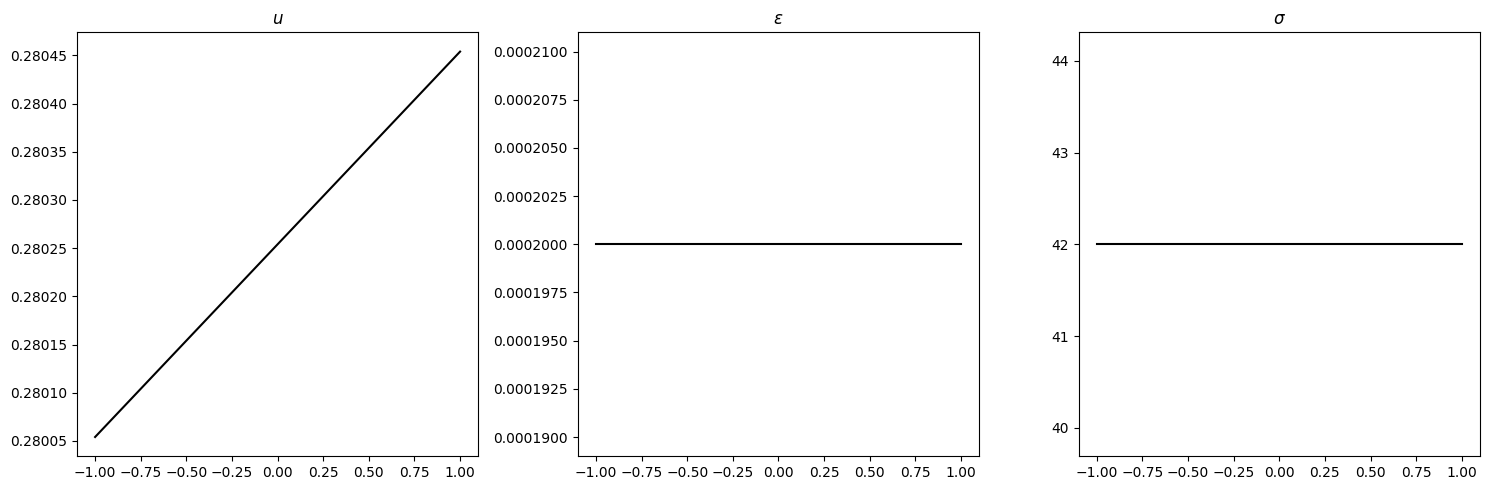

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")
fig.tight_layout()
plt.show()